In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [3]:
(trainX,trainY),(testX,testY) = mnist.load_data()

In [4]:
np.asarray(trainX[0].shape)

array([28, 28])

In [5]:
from keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(9*9*32, activation = 'relu'))
model.add(layers.Dense(10,activation = 'softmax'))

model.compile(optimizer ='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])



In [6]:
from keras.utils.np_utils import to_categorical as to_cat
trainY = to_cat(trainY)
testY = to_cat(testY)
trainX = trainX.reshape(60000,28,28,1)
testX = testX.reshape(10000,28,28,1)

In [7]:
valX = trainX[:10000]
valY = trainY[:10000]
trainX = trainX[10000:]
trainY = trainY[10000:]

In [8]:
datagen = ImageDataGenerator(rescale = 1.0/255)

In [9]:
model.fit(datagen.flow(trainX, trainY),  epochs=1, validation_data = (valX,valY))

1563/1563 [==============================] - 29s 19ms/step - loss: 0.1230 - accuracy: 0.9603 - val_loss: 17.4925 - val_accuracy: 0.9826


In [10]:
model.evaluate(testX, testY)

313/313 [==============================] - 1s 4ms/step - loss: 15.1016 - accuracy: 0.9829


[15.101598739624023, 0.9829000234603882]

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 2592)              2076192   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

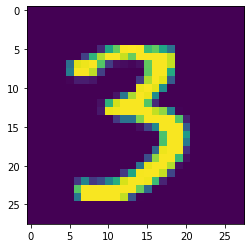

In [38]:
convPred = trainX[0].reshape(28,28)
plt.imshow(convPred)
convPred = convPred.reshape(1,28,28)

In [52]:
outputLayers = [layer.output for layer in model.layers][:4]
inputLayer = model.input

In [53]:
activation_model = models.Model(inputs = inputLayer, outputs = outputLayers)

In [54]:
activation_model

In [95]:
prediction = activation_model.predict(convPred)[3]


<ipython-input-97-fa800ae2caf9>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.matshow(prediction[0, :, :,i])


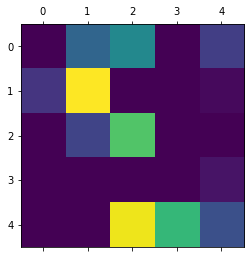

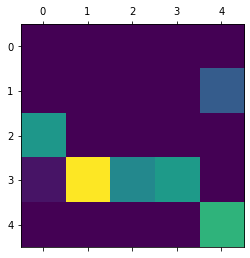

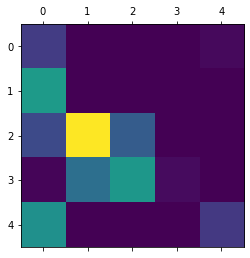

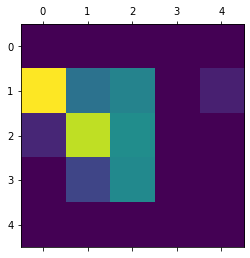

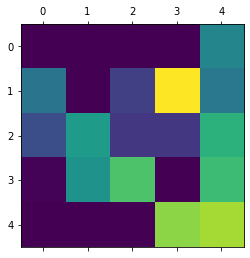

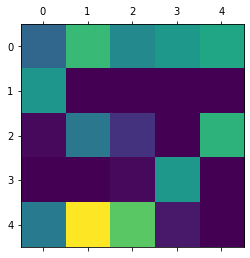

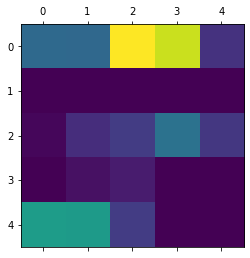

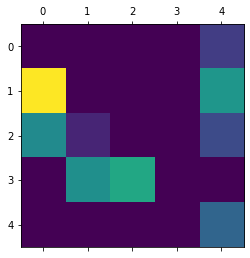

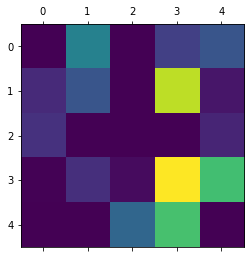

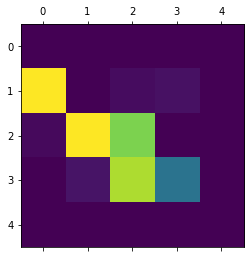

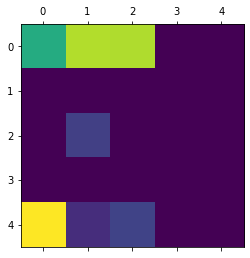

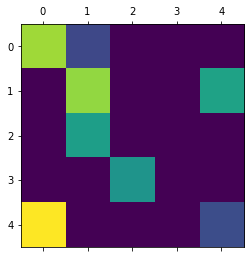

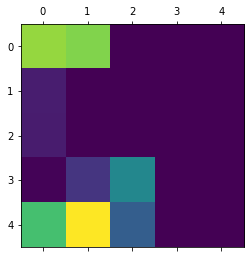

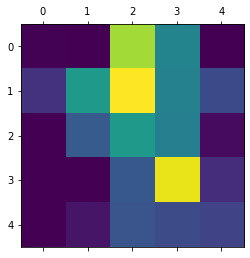

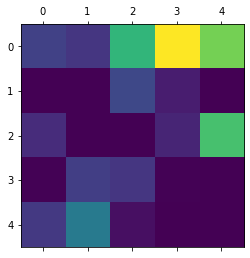

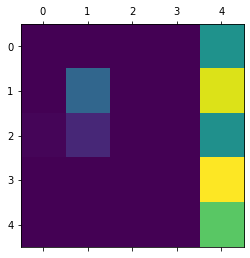

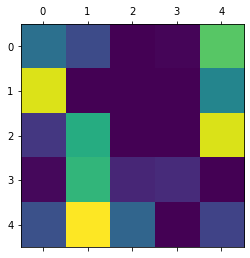

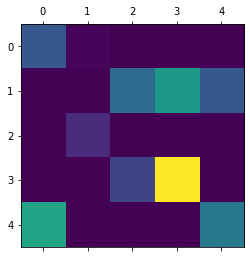

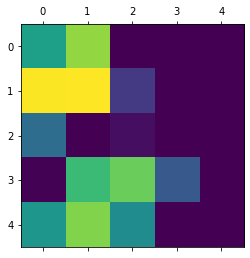

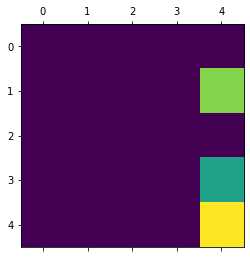

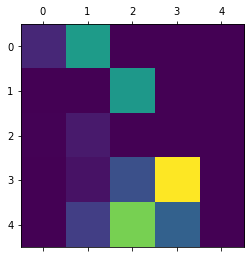

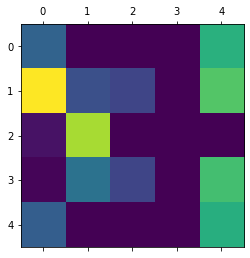

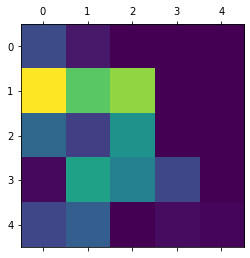

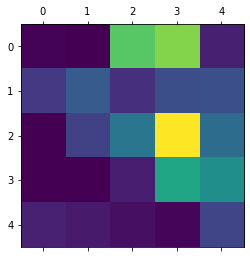

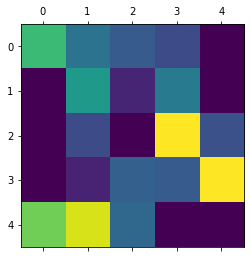

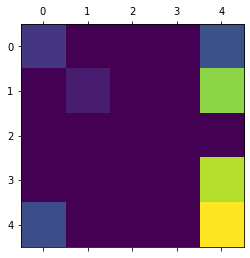

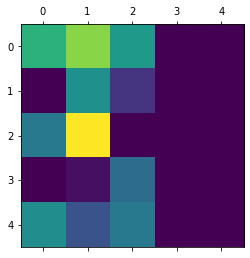

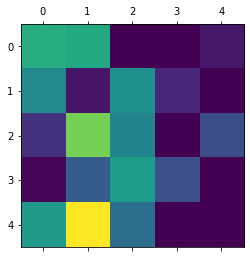

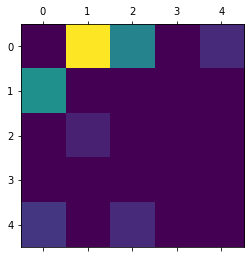

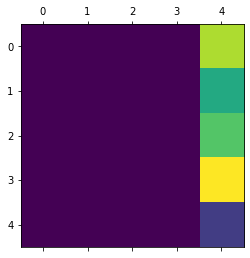

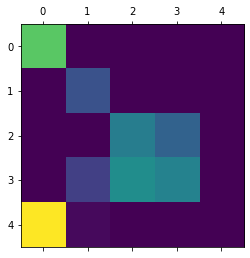

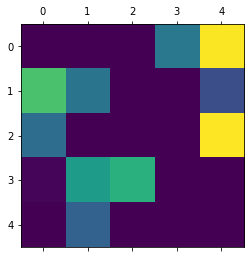

In [97]:
for i in range(32):
    
    plt.matshow(prediction[0, :, :,i])

In [63]:
prediction[0][0]

array([[[0.        , 0.        , 0.00480654, ..., 0.        ,
         0.01146242, 0.        ],
        [0.        , 0.        , 0.00480654, ..., 0.        ,
         0.01146242, 0.        ],
        [0.        , 0.        , 0.00480654, ..., 0.        ,
         0.01146242, 0.        ],
        ...,
        [0.        , 0.        , 0.00480654, ..., 0.        ,
         0.01146242, 0.        ],
        [0.        , 0.        , 0.00480654, ..., 0.        ,
         0.01146242, 0.        ],
        [0.        , 0.        , 0.00480654, ..., 0.        ,
         0.01146242, 0.        ]],

       [[0.        , 0.        , 0.00480654, ..., 0.        ,
         0.01146242, 0.        ],
        [0.        , 0.        , 0.00480654, ..., 0.        ,
         0.01146242, 0.        ],
        [0.        , 0.        , 0.00480654, ..., 0.        ,
         0.01146242, 0.        ],
        ...,
        [0.        , 0.        , 0.00480654, ..., 0.        ,
         0.01146242, 0.        ],
        [0. 